# Hotdog-nothotdog

## Step 1 - make the dataset
Step one is making the dataset
Imagine you have two folders full of pictures.
One of HotDogs and another of NotHotDogs.
Below I am assigning the folder name as the class or label column.

Purely as an example dataset, see https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

get hot-dog-not-hot-dog.zip

## Step 2 - resize the pictures
Let's assume your dataset is in the folder Hotdog-Nothotdog

In [1]:
import glob
import os
import pandas as pd
from PIL import Image

In [3]:
!unzip hotdog-nothotdog-kaggle-orig.zip

Archive:  hotdog-nothotdog-kaggle-orig.zip
   creating: test/
   creating: test/hot_dog/
  inflating: test/hot_dog/133012.jpg  
  inflating: test/hot_dog/133015.jpg  
  inflating: test/hot_dog/133245.jpg  
  inflating: test/hot_dog/135628.jpg  
  inflating: test/hot_dog/138933.jpg  
  inflating: test/hot_dog/138937.jpg  
  inflating: test/hot_dog/138969.jpg  
  inflating: test/hot_dog/139177.jpg  
  inflating: test/hot_dog/142835.jpg  
  inflating: test/hot_dog/143012.jpg  
  inflating: test/hot_dog/144956.jpg  
  inflating: test/hot_dog/146227.jpg  
  inflating: test/hot_dog/146834.jpg  
  inflating: test/hot_dog/147874.jpg  
  inflating: test/hot_dog/152106.jpg  
  inflating: test/hot_dog/154409.jpg  
  inflating: test/hot_dog/154545.jpg  
  inflating: test/hot_dog/156126.jpg  
  inflating: test/hot_dog/156135.jpg  
  inflating: test/hot_dog/160274.jpg  
  inflating: test/hot_dog/160523.jpg  
  inflating: test/hot_dog/161911.jpg  
  inflating: test/hot_dog/165005.jpg  
  inflating: t

In [4]:
%cd train
images = glob.glob('*/*.jpg')

/Users/gustavmaskowitz/Projects/hotdogdemo/train


In [7]:
images
list(map(os.path.dirname, images))

['not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_hot_dog',
 'not_ho

In [8]:
classes = list(map(os.path.dirname, images))
dataset_index = pd.DataFrame({'image': images, 'class': classes})
dataset_index.head()

,class,image
0,not_hot_dog,not_hot_dog/230015.jpg
1,not_hot_dog,not_hot_dog/102037.jpg
2,not_hot_dog,not_hot_dog/256347.jpg
3,not_hot_dog,not_hot_dog/296611.jpg
4,not_hot_dog,not_hot_dog/835998.jpg


Now create an index.csv file, zip the folders and index.csv together and you have a working upload to start experimenting on.

In [9]:
dataset_index.to_csv('index.csv', index=False)

In [10]:
# Here we resize all the images listed in the index file.
# This CHANGES the images in the 'train' directory to the size specified
IMAGE_SIZE = (96,96)
for idx, row in dataset_index.iterrows():
    image_column = row["image"]
    im = Image.open(image_column)
    im = im.resize(IMAGE_SIZE)
    #print("about to resize", img_name)
    im.save(image_column)
    #print("Just saved", image_column)
print("Done")

Done


## Step 3 - Make your dataset ready for upload
We currently accept a bundled zip, with an index file + content dir

In [11]:
!zip -q ../hotdogbundle.zip -r ./

In [25]:
%cd /Users/gustavmaskowitz/Projects/hotdogdemo

/Users/gustavmaskowitz/Projects/hotdogdemo


## Step 4 - Go build the model
Go to https://platform.peltarion.com
Do your thing, flick on the deployment and grab the creds
Choose a CNN off the shelf, trainm , deploy. Done

## Step 5 - Test it

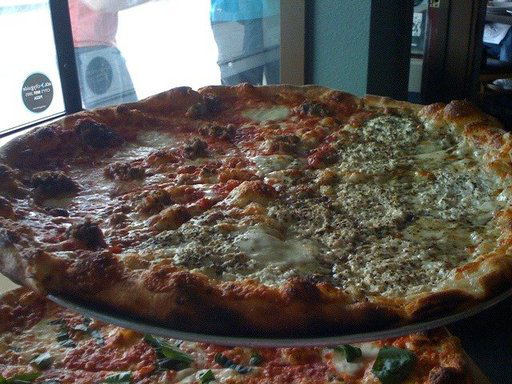

In [36]:
testimage = Image.open('test/hot_dog/<>jpg')
# And recall that the resixing done above was "IMAGE_SIZE = (224,224)"
testimage

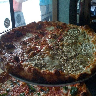

In [37]:
# IMAGE_SIZE = (224,224) This was set above
testimage = testimage.resize(IMAGE_SIZE)
testimage

In [38]:
outfile = 'test-out.jpg'
testimage.save(outfile)